In [29]:
import pandas as pd


In [30]:
#Define the sales file path
sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path

#Define the customer file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path

#loading sales_file CSV into pandas dataframe
sales_df = pd.read_csv(sales_files)

#loading customer_file CSV into pandas dataframe
customer_df = pd.read_csv(customer_files)

In [204]:
sales_df.head()

,sales_date,product_id,product_category,sales_quantity,unit_price,region,customer_id,sales_amount
0,2023-04-04,1020,Clothing,8,867.27,North,10468,6938.16
1,2023-03-12,1043,Furniture,8,519.32,West,10138,4154.56
2,2023-06-26,1048,Clothing,5,466.13,East,10282,2330.65
3,2023-05-15,1033,Electronics,10,559.61,North,10136,5596.10
4,2023-08-22,1032,Toys,4,699.72,South,10120,2798.88


In [34]:
#B.merge sales files with customer files
import pandas as pd

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path

#loading sales_file CSV into pandas dataframe
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge (sales_df , customer_df , on="customer_id" , how='left')
df= pd.DataFrame(merge_df)
print (df)

       sales_date  product_id product_category  sales_quantity  unit_price  \
0      2023-04-04        1020         Clothing               8      867.27   
1      2023-03-12        1043        Furniture               8      519.32   
2      2023-03-12        1043        Furniture               8      519.32   
3      2023-03-12        1043        Furniture               8      519.32   
4      2023-03-12        1043        Furniture               8      519.32   
...           ...         ...              ...             ...         ...   
13679  2023-06-10        1002            Books               3      661.19   
13680  2023-06-10        1002            Books               3      661.19   
13681  2023-07-07        1033             Toys               2      438.62   
13682  2023-09-25        1004            Books              10      829.70   
13683  2023-04-21        1035             Toys               3      489.43   

      region  customer_id      customer_name                   

In [462]:
#c. Check for and handle missing values appropriately.
import pandas as pd

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path

#loading sales_file CSV into pandas dataframe
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge (sales_df , customer_df , on="customer_id" , how='left')

# Check for missing values
print ("missimg values in sales:")
print (sales_df.isnull().sum())
print ("missimg values in customer:")
print (customer_df.isnull().sum())

#handle missing values 
merge_df = merge_df.dropna()
print("\nShape of cleaned DataFrame (after dropping rows with missing values):")
merge_df.shape

missimg values in sales:
sales_date          0
product_id          0
product_category    0
sales_quantity      0
unit_price          0
region              0
customer_id         0
dtype: int64
missimg values in customer:
customer_id      0
customer_name    0
email            0
phone_number     0
address          0
dtype: int64

Shape of cleaned DataFrame (after dropping rows with missing values):


(10218, 11)

In [467]:
#fill with a fixed value
fill_data= merge_df.fillna({"customer_name":"0",
                                 "email":"0",
                                 "phone_number":"0",
                                 "address":"0"
                                })
merge_df.shape

(10218, 11)

In [85]:
# #d. Convert the 'sales_date' column to datetime format.
sales_df['sales_date'] = pd.to_datetime(sales_df['sales_date'])
print(sales_df.head())



  sales_date  product_id product_category  sales_quantity  unit_price region  \
0 2023-04-04        1020         Clothing               8      867.27  North   
1 2023-03-12        1043        Furniture               8      519.32   West   
2 2023-06-26        1048         Clothing               5      466.13   East   
3 2023-05-15        1033      Electronics              10      559.61  North   
4 2023-08-22        1032             Toys               4      699.72  South   

   customer_id  
0        10468  
1        10138  
2        10282  
3        10136  
4        10120  


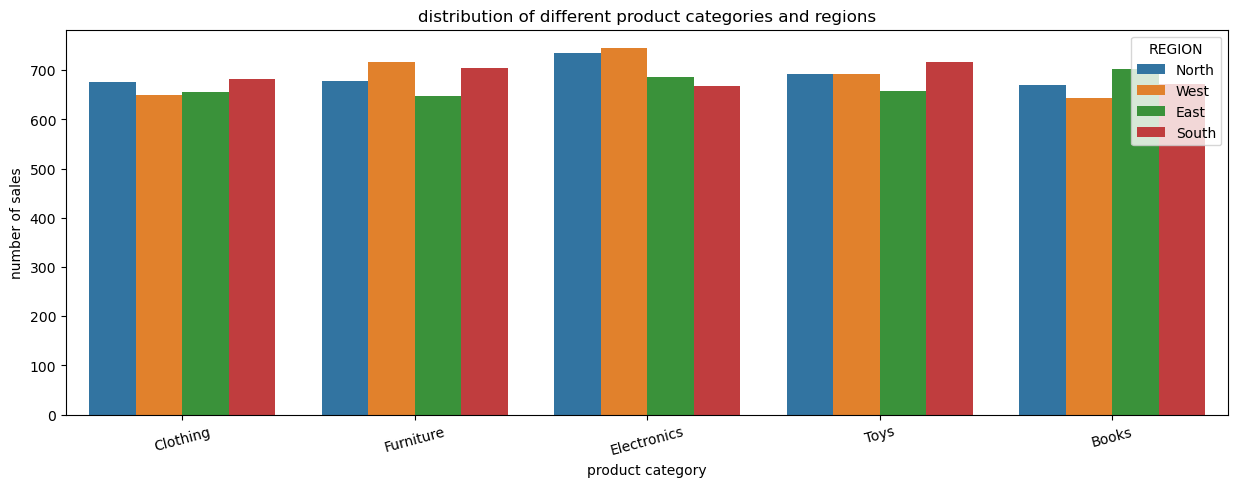

In [105]:
# Data Exploration:
# Explore the distribution of sales across different product categories and regions.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge (sales_df , customer_df , on="customer_id" , how='left')
df=pd.DataFrame(merge_df)

plt.figure(figsize=(15,5))
sns.countplot(data=merge_df,x="product_category", hue="region")
plt.title("distribution of different product categories and regions")
plt.xlabel("product category")
plt.ylabel("number of sales")
plt.legend(title="REGION")
plt.xticks(rotation=15)
plt.show()


   year  unit_price
0  2023  6901299.94


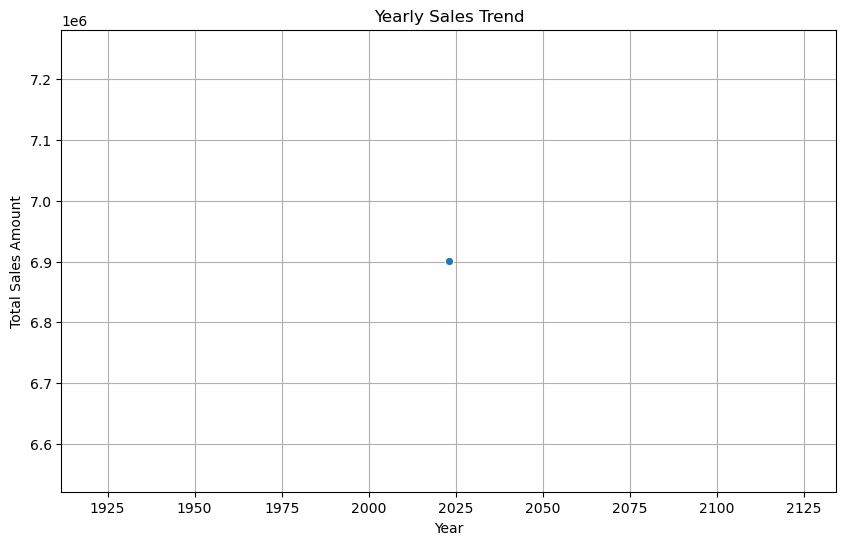

In [299]:
# b. Analyze the monthly and yearly sales trends.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge(sales_df, customer_df, on="customer_id", how='left')

# Convert 'sales_date' to datetime
merge_df['sales_date'] = pd.to_datetime(merge_df['sales_date'], errors='coerce')

# Drop missing values
merge_df.dropna(subset=['sales_date', 'unit_price'], inplace=True)
merge_df['unit_price'] = pd.to_numeric(merge_df['unit_price'], errors='coerce')

# Extract the year from 'sales_date'
merge_df['year'] = merge_df['sales_date'].dt.year

# Group by year and calculate total sales amount
yearly_sales = merge_df.groupby('year')['unit_price'].sum().reset_index()

# Verify the grouped data
print(yearly_sales)

# Visualize the Sales Trends
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_sales, x='year', y='unit_price', marker='o')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()

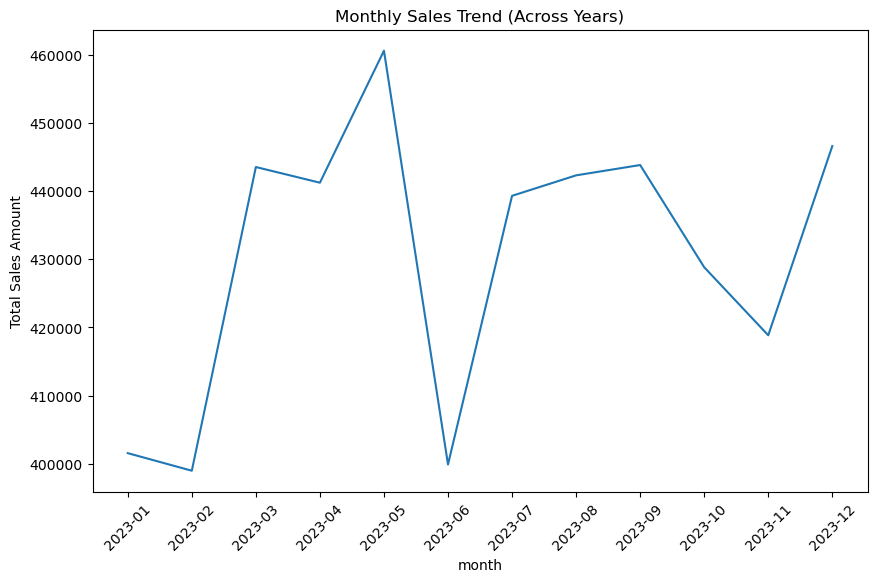

In [302]:
# Monthly saled trends
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge(sales_df, customer_df, on="customer_id", how='left')
merge_df['sales_date'] = pd.to_datetime(merge_df['sales_date'], errors='coerce')

# Drop rows with missing values
merge_df.dropna(inplace=True)

# Ensure 'unit_price' is numeric
merge_df['unit_price'] = pd.to_numeric(merge_df['unit_price'], errors='coerce')

# Check for any non-numeric values in 'unit_price'
non_numeric_prices = merge_df[merge_df['unit_price'].isna()]
#print("Non-numeric 'unit_price' values:\n", non_numeric_prices)

# Remove rows with non-numeric 'unit_price'
merge_df.dropna(subset=['unit_price'], inplace=True)
# Extract the month from 'sales_date'
merge_df['month'] = merge_df['sales_date'].dt.to_period('M')
# Group by month and calculate total sales amount
monthly_sales = merge_df.groupby('month')['unit_price'].sum().reset_index()

# Ensure 'month' is converted back to string for plotting purposes
monthly_sales['month'] = monthly_sales['month'].astype(str)
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='month', y='unit_price')
plt.title("Monthly Sales Trend (Across Years)")
plt.xlabel("month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

,sales_date,product_id,product_category,sales_quantity,unit_price,region,customer_id,customer_name,email,phone_number,address,sales_amount
0,2023-04-04,1020,Clothing,8,867.27,North,10468,Patty Alvarado,danielhicks@example.net,+1-279-465-8591x737,"10164 Chelsea Pike\nKatiehaven, HI 26188",6938.16
1,2023-03-12,1043,Furniture,8,519.32,West,10138,Richard Paul,stephanieedwards@example.com,434-470-2932x78772,"995 Robert Heights Suite 724\nNew Timothy, MO ...",4154.56
2,2023-03-12,1043,Furniture,8,519.32,West,10138,Edward Schroeder,hillariel@example.com,272-251-7307,USNS Dillon\nFPO AE 16799,2330.65
3,2023-03-12,1043,Furniture,8,519.32,West,10138,John Duran,tallen@example.org,(487)394-4155,"0978 Watkins Forks Apt. 689\nColinmouth, MO 75124",5596.10
4,2023-03-12,1043,Furniture,8,519.32,West,10138,Claire Garcia,calebjames@example.com,8294478979,"382 Richardson Pike Suite 484\nReyesmouth, MS ...",2798.88


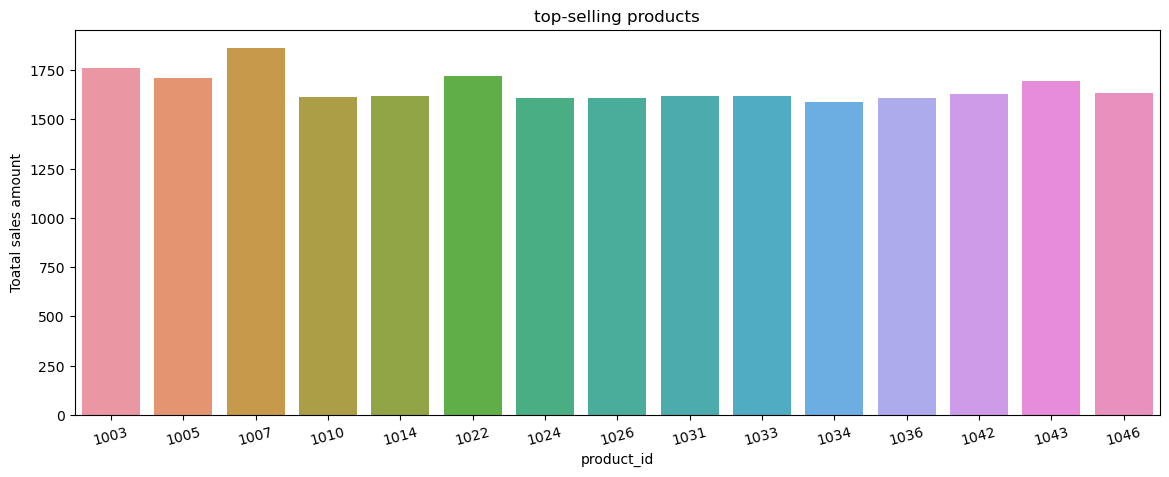

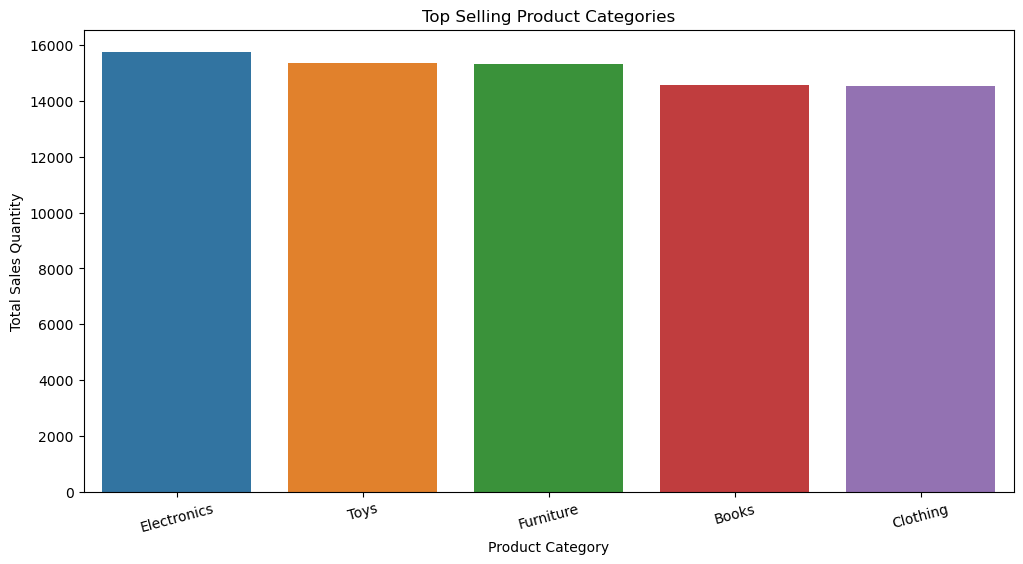

In [311]:
# c. Identify the top-selling products and product categories.
# Identify Top-Selling Products
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge (sales_df , customer_df , on="customer_id" , how='left')
df=pd.DataFrame(merge_df)

# # Calculate Total Sales Amount
# merge_df['sales_quantity'] = sales_df['sales_quantity'] * sales_df['unit_price']
# merge_df.head()
top_products = merge_df.groupby('product_id')['sales_quantity'].sum().reset_index()
top_products = top_products.sort_values(by='sales_quantity', ascending=False)

# # Calculate total sales quantity for each product category
top_categories = merge_df.groupby('product_category')['sales_quantity'].sum().reset_index()
top_categories = top_categories.sort_values(by='sales_quantity', ascending=False)


# Identify the top-selling products
plt.figure(figsize=(14,5))
sns.barplot(data=top_products.head(15), x='product_id', y='sales_quantity')
plt.title('top-selling products')
plt.xlabel('product_id')
plt.ylabel('Toatal sales amount')
plt.xticks(rotation=15)
plt.show()

# # Identify the top-selling product categories
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='product_category', y='sales_quantity')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=15)
plt.show()          

In [315]:
# d. Calculate the total revenue generated by each region.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge (sales_df , customer_df , on="customer_id" , how='left')
# df=pd.DataFrame(merge_df)

# Calculate Total Sales Amount
merge_df['sales_revenue'] = merge_df['sales_quantity'] * merge_df['unit_price']
sales_df.head(2)
# Aggregating the Total Revenue by Region
region_region= merge_df.groupby("region")["sales_revenue"].sum().reset_index()
region_region.head()

,region,sales_revenue
0,East,9164087.89
1,North,9573181.05
2,South,9606836.85
3,West,9698668.34


In [316]:
# Data Analysis:
# Calculate the total sales quantity and revenue for each product category.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)
merge_df = pd.merge (sales_df , customer_df , on="customer_id" , how='left')
merge_df["sales_revenue"] = merge_df["sales_quantity"]* merge_df["unit_price"]

In [317]:
sales_category = merge_df.groupby("product_category").agg(
    total_sales_quantity = ("sales_quantity", "sum"),
    total_revenue = ("sales_revenue", "sum")
).reset_index()
sales_category.head()

,product_category,total_sales_quantity,total_revenue
0,Books,14563,7512976.44
1,Clothing,14544,7246719.13
2,Electronics,15771,7971468.64
3,Furniture,15313,7683729.63
4,Toys,15363,7627880.29


In [348]:
# b. Determine the average unit price for each product category.
# calculate the average unit price for each product category.

category_avg_price = merge_df.groupby('product_category').agg(
    avg_unit_price = ('unit_price','mean')

).reset_index()

category_avg_price.head()

,product_category,avg_unit_price
0,Books,518.301767
1,Clothing,497.757526
2,Electronics,499.989778
3,Furniture,503.547613
4,Toys,502.305822


                sales_quantity  unit_price  sales_revenue
sales_quantity        1.000000   -0.005515       0.623650
unit_price           -0.005515    1.000000       0.691673
sales_revenue         0.623650    0.691673       1.000000


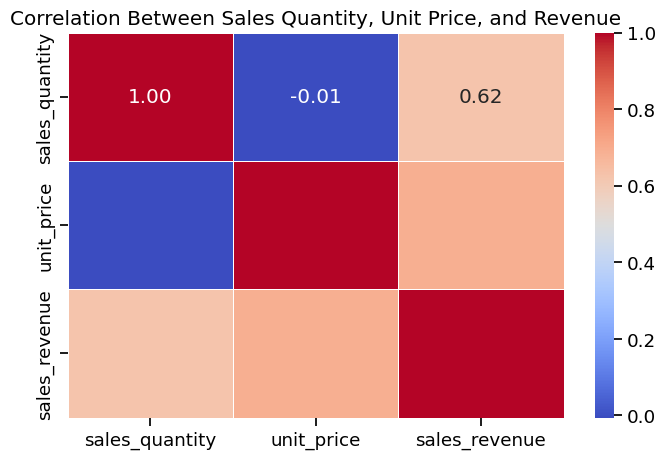

In [456]:
# Calculate correlation matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv"  # sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv"  # customer file path

# Load data
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)

# Merge datasets
merge_df = pd.merge(sales_df, customer_df, on="customer_id", how='left')

# Calculate sales revenue
merge_df["sales_revenue"] = merge_df["sales_quantity"] * merge_df["unit_price"]

# Calculate correlation matrix on merge_df
correlation_matrix = merge_df[['sales_quantity', 'unit_price', 'sales_revenue']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Sales Quantity, Unit Price, and Revenue")
plt.show()

# # Plot the pairplot
# sns.pairplot(top_products[['sales_quantity', 'unit_price', 'sales_revenue']],height=5)
# plt.suptitle('Pairplot of Sales Quantity, Unit Price, and sales_revenue', fontsize=20)
# plt.show()

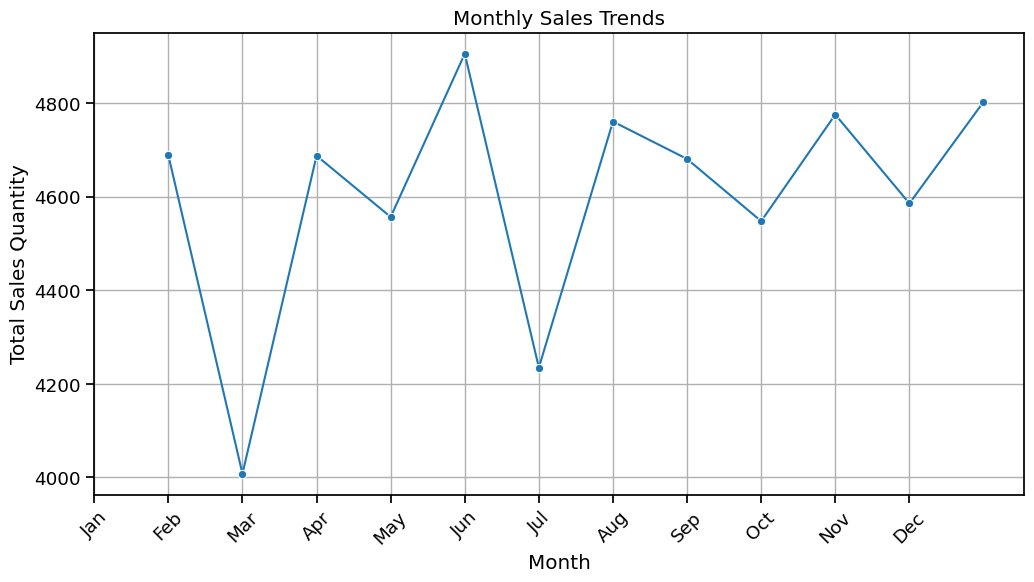

In [460]:
# d. Identify any seasonal patterns or trends in sales data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)

# Yearly saled trends
sales_df['sales_date'] = pd.to_datetime(sales_df['sales_date'])

# Extract month and year from date
sales_df['month'] = sales_df['sales_date'].dt.month
sales_df['year'] = sales_df['sales_date'].dt.year

# Aggregate sales data by month and year
monthly_sales = sales_df.groupby(['year', 'month'])['sales_quantity'].sum().reset_index() 
# Plot monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sales_quantity', data=monthly_sales, marker='o')  
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

In [413]:
# Customer Analysis:
# Identify the top-paying customers based on total spending.

# Calculate total spending for each transaction
sales_df['total_spending'] = sales_df['sales_quantity'] * sales_df['unit_price']

# Calculate total spending for each customer
customer_spending = sales_df.groupby('customer_id')['total_spending'].sum().reset_index()

# Merge with customer details
top_paying_customers = pd.merge(customer_spending, customer_df, on='customer_id')

# Sort customers by total spending in descending order
top_paying_customers = top_paying_customers.sort_values(by='total_spending', ascending=False)

# Display the top 10 paying customers
top_5_paying_customers = top_paying_customers.head(5)
print(top_5_paying_customers)

     customer_id  total_spending     customer_name                     email  \
255        10244       118388.72     Sharon Fowler   annharrison@example.com   
89         10095       111564.22      Michael Lang      nandrews@example.net   
87         10095       111564.22    Clinton Sparks   walkerjames@example.com   
88         10095       111564.22       Ashley Moss  robertkelley@example.com   
145        10144       104736.33  Rebecca Thompson     smithjuan@example.net   

              phone_number                                            address  
255           571.873.4203  05944 Nichols Passage Suite 893\nSouth Martinm...  
89    +1-597-971-9899x7535        90732 Glover Station\nPort Justin, IN 37137  
87    +1-536-415-8038x0232                   PSC 4612, Box 8958\nAPO AA 21248  
88           (545)567-5538   20632 Jonathan Walks\nWest Timothytown, VI 76335  
145  001-529-499-7761x6616        770 Rodriguez Burgs\nDianechester, OK 65888  


In [400]:
# Determine the average spending per customer.

import pandas as pd

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)
customer_df = pd.read_csv(customer_files)

# Calculate total spending for each transaction
sales_df['total_spending'] = sales_df['sales_quantity'] * sales_df['unit_price']

# Calculate total spending for each customer
customer_spending = sales_df.groupby('customer_id')['total_spending'].sum().reset_index()

# Calculate the average spending per customer
avrg_spending_per_customer = customer_spending['total_spending'].mean()
# Display the result
print(f"The average spending per customer is: {average_spending_per_customer:.1f}")

The average spending per customer is: 55907.6


cohort_period           0         1         2         3         4         5   \
first_purchase_period                                                          
2023-01                1.0  0.770171  0.838631  0.821516  0.811736  0.782396   
2023-02                1.0  0.833333  0.805556  0.819444  0.805556  0.777778   
2023-03                1.0  0.823529  0.823529  0.882353  1.000000  0.705882   
2023-04                1.0  1.000000  1.000000  1.000000  1.000000  0.000000   
2023-05                1.0  1.000000  1.000000  1.000000  1.000000  1.000000   

cohort_period                6         7         8         9         10  \
first_purchase_period                                                     
2023-01                0.797066  0.816626  0.823961  0.833741  0.794621   
2023-02                0.875000  0.805556  0.819444  0.847222  0.805556   
2023-03                0.823529  0.705882  0.764706  0.882353  0.000000   
2023-04                1.000000  1.000000  1.000000  0.000000  0

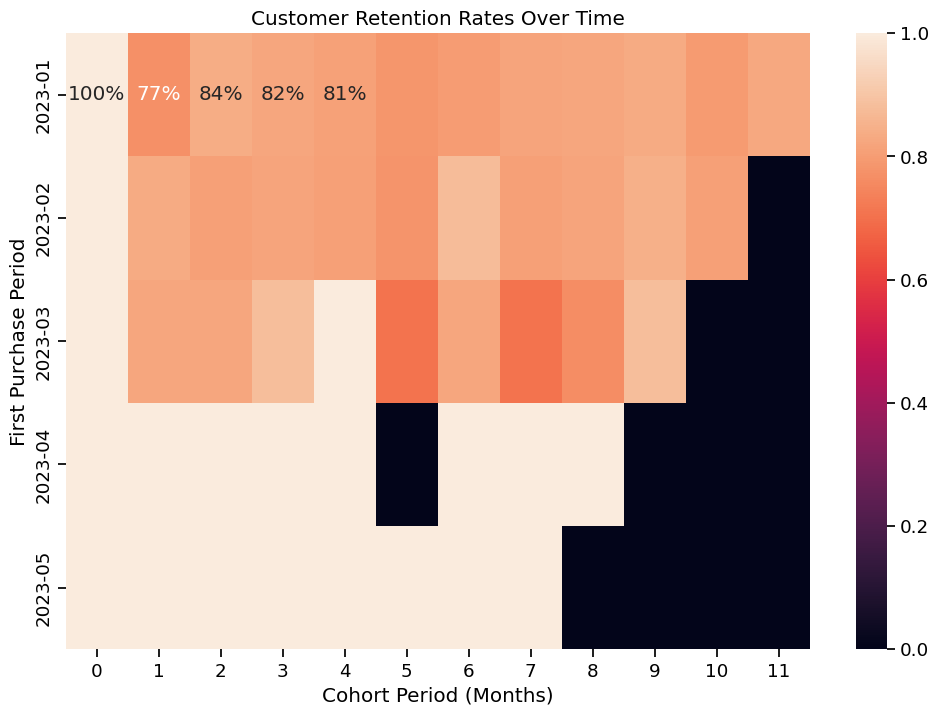

In [425]:
# Analyze customer retention rates over time.
import pandas as pd

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)

# Convert sales_date to datetime format
sales_df['sales_date'] = pd.to_datetime(sales_df['sales_date'])

# Extract year and month from sales_date
sales_df['year_month'] = sales_df['sales_date'].dt.to_period('M')

# Determine the first purchase date for each customer
first_purchase = sales_df.groupby('customer_id')['sales_date'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']
first_purchase['first_purchase_period'] = first_purchase['first_purchase_date'].dt.to_period('M')

# Merge first purchase date with sales data
sales_df = sales_df.merge(first_purchase, on='customer_id')

# Create a DataFrame to track retention
retention_df = sales_df[['customer_id', 'year_month', 'first_purchase_period']].drop_duplicates()

# Calculate retention by period
retention_df['cohort_period'] = (retention_df['year_month'] - retention_df['first_purchase_period']).apply(lambda x: x.n)
retention_counts = retention_df.groupby(['first_purchase_period', 'cohort_period']).size().unstack(fill_value=0)

# Calculate retention rates
retention_rates = retention_counts.div(retention_counts.iloc[:, 0], axis=0)

# Display the retention rates
print(retention_rates)

# Plot the retention rates
plt.figure(figsize=(12, 8))
sns.heatmap(retention_rates, annot=True, fmt='.0%')
plt.title('Customer Retention Rates Over Time')
plt.xlabel('Cohort Period (Months)')
plt.ylabel('First Purchase Period')
plt.show()


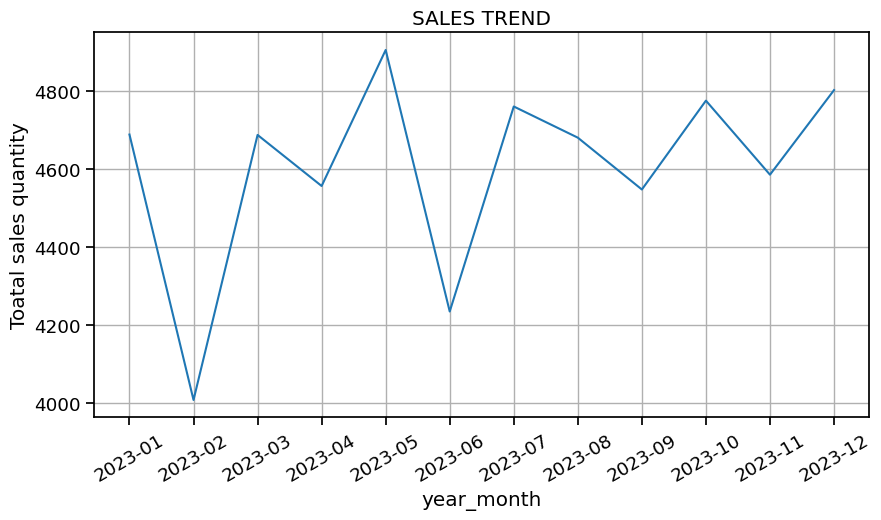

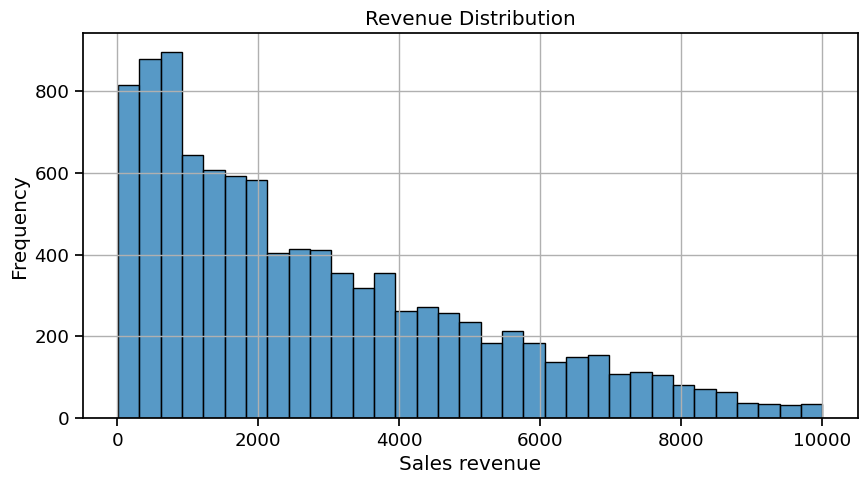

In [445]:
# Data Visualization:
# Create visualizations (e.g., bar plots, line plots, scatter plots) to represent sales trends, revenue distribution, and customer analysis 

import pandas as pd

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)

# convert sales_date to datetime
sales_df['sales_date']= pd.to_datetime(sales_df['sales_date'])

# Extracting mont and year from sales_date
sales_df['year_month']= sales_df['sales_date'].dt.to_period('M').astype(str)

# sales trend
sales_trend = sales_df.groupby('year_month')['sales_quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data = sales_trend, x='year_month', y ='sales_quantity')
plt.title('SALES TREND')
plt.xlabel('year_month')
plt.ylabel('Toatal sales quantity')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

# calculating the revenue for each transactions
sales_df['sales_revenue']= sales_df['sales_quantity']* sales_df['unit_price']

# Revenue Distribution
plt.figure(figsize=(10, 5))
sns.histplot(sales_df['sales_revenue'])
plt.title ('Revenue Distribution')
plt.xlabel('Sales revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

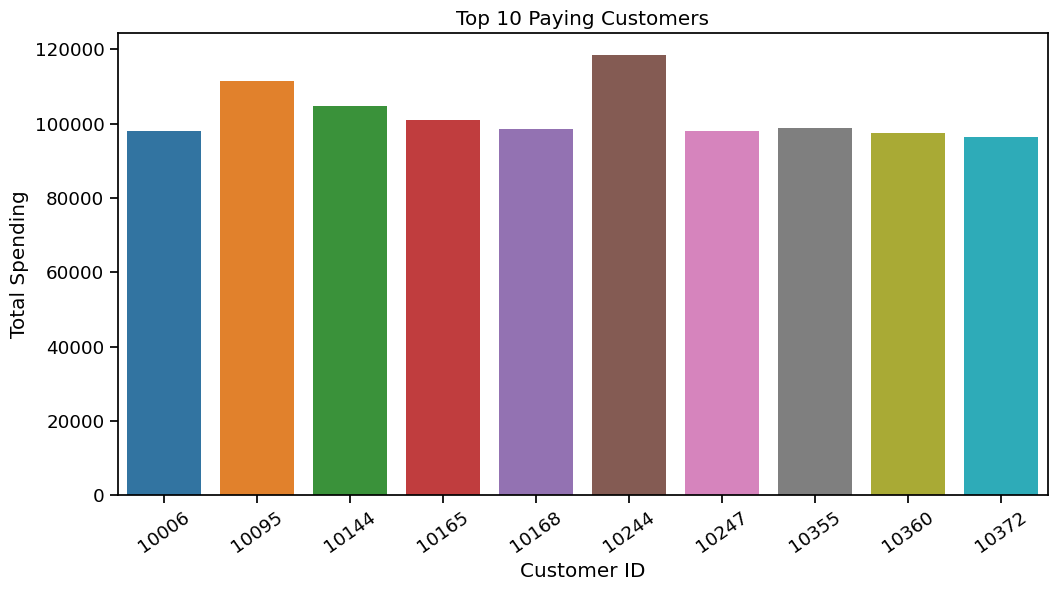

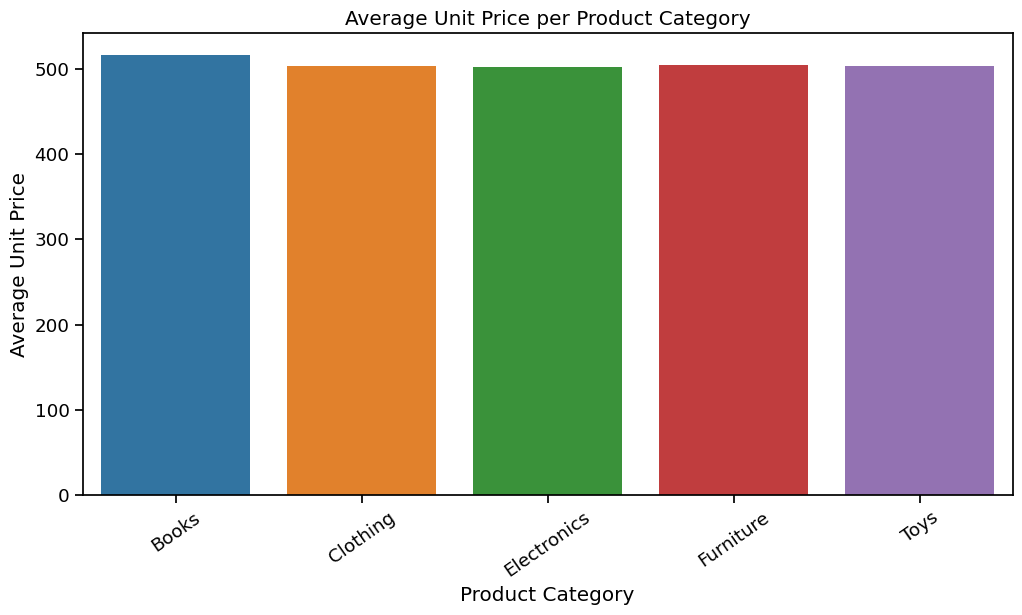

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_files ="C:/Users/umugad/Downloads/Project1/sales_data.csv" #the sales file path
customer_files = "C:/Users/umugad/Downloads/Project1/customer_data.csv" # customer file path
sales_df = pd.read_csv(sales_files)

# Convert sales_date to datetime format
sales_df['sales_date'] = pd.to_datetime(sales_df['sales_date'])

# calculating the revenue for each transactions
sales_df['sales_revenue']= sales_df['sales_quantity']* sales_df['unit_price']

# Customer Analysis:  top-paying customers
customer_spending = sales_df.groupby('customer_id')['sales_revenue'].sum().reset_index()
top_customers = customer_spending.sort_values(by='sales_revenue', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='customer_id', y='sales_revenue')
plt.title('Top 10 Paying Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=35)
plt.show()

#  Customer Analysis average unit price per product category
average_unit_price_per_category = sales_df.groupby('product_category')['unit_price'].mean().reset_index()
average_unit_price_per_category.columns = ['product_category', 'average_unit_price']
plt.figure(figsize=(12, 6))
sns.barplot(data=average_unit_price_per_category, x='product_category', y='average_unit_price')
plt.title('Average Unit Price per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=35)
plt.show()
